**Autoencoder** is a type of neural network that can be used to learn a **compressed** representation of raw data. An autoencoder is composed of an **encoder** and a **decoder** sub-models. The *encoder compresses* the input and the *decoder attempts to recreate the input* from the compressed version provided by the encoder.

**https://pythonprogramming.net/autoencoders-tutorial/**

2021-09-21 19:36:55.644338: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-21 19:36:55.645067: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11493376/11490434 [==============================] - 0s 0us/step


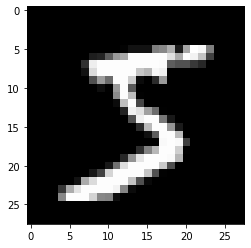

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap = 'gray')

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
print(x_train[0].min())
print(x_train[0].max())

0
255


In [4]:
#normalize the data of pixel b/w o to 1.
x_train = x_train/255.
x_test = x_test/255.

In [5]:
print(x_train[0].min())
print(x_train[0].max())

0.0
1.0


In [10]:
encoder_input = keras.Input(shape = (28, 28, 1), name = 'img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation = "relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name = "encoder")

decoder_input = keras.layers.Dense(64, activation = "relu")(encoder_output)
x = keras.layers.Dense(784, activation = "relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

opt = keras.optimizers.Adam(lr = 0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [11]:
autoencoder.compile(opt, loss = "mse")

In [12]:
epochs = 3
for epoch in range(epochs):
    history = autoencoder.fit(
                            x_train,
                            x_train,
                            epochs = 1,
                            batch_size = 32,
                            validation_split = 0.10)
    autoencoder.save(f"models/AE-{epoch+1}.model")

2021-09-21 19:44:41.329535: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-21 19:44:41.344098: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


1688/1688 [==============================] - 6s 3ms/step - loss: 0.0313 - val_loss: 0.0141


2021-09-21 19:44:47.610601: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


1688/1688 [==============================] - 5s 3ms/step - loss: 0.0119 - val_loss: 0.0117


In [14]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])
print(example[0].shape)
print(example[0])

(64,)
[2.232827   0.34735164 0.83014154 1.6859139  0.0488695  0.8129456
 1.7157158  0.         0.04277188 1.2025464  1.678904   0.13423494
 0.17265406 1.1538098  0.8960643  1.5153965  1.6766274  1.4561667
 0.73628783 0.         0.53177327 0.89502287 0.6786231  0.75006217
 0.7295323  1.5832165  0.80736566 2.7633374  0.15287659 2.4747233
 0.72576165 1.4181944  1.199491   0.36805952 1.2819588  1.3207192
 1.5445791  1.9502624  0.8914405  1.6016923  0.38768634 0.94888157
 0.3009546  1.704103   1.6945564  1.4072678  0.05222676 2.069749
 1.5066109  1.1238322  0.5144564  0.40395778 0.68574816 2.5374556
 1.7160348  0.         0.6523357  0.34834367 1.599571   1.4212903
 0.8541653  0.         0.59766865 2.1821213 ]


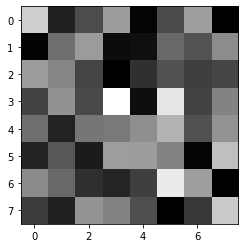

In [15]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

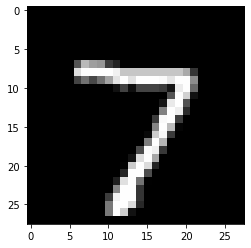

In [16]:
plt.imshow(x_test[0], cmap="gray")

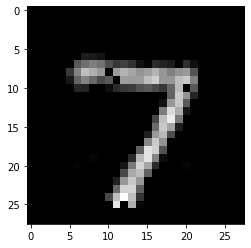

In [17]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]
plt.imshow(img, cmap="gray")

In [24]:
model = keras.models.load_model('./models/AE-2.model')

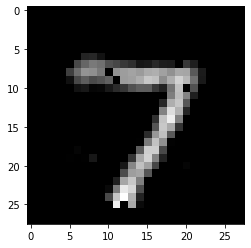

In [25]:
ae_out = model.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]
plt.imshow(img, cmap="gray")